| **Inicio** | **atrás 6** | **Siguiente 8** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./6_Machine_Learning.ipynb)| [⏩](./8_Machine_Learning.ipynb)|

# **61. Regresión logística | Código de truco del perceptrón**

La regresión logística puede entenderse como una generalización del perceptrón. De hecho, el truco del perceptrón se utiliza para encontrar los parámetros de la regresión logística. El perceptrón es un clasificador binario muy simple que utiliza una función escalón como función de activación. Sin embargo, la función de activación de la regresión logística es una función sigmoide (o logística), que produce salidas continuas en lugar de binarias.

**Truco del Perceptrón para la Regresión Logística:**

1. **Función de Activación Sigmoidal:**
   $\sigma(z) = \frac{1}{1 + e^{-z}}$

   Donde $(z)$ es la suma ponderada de las entradas (características), $z = \mathbf{w}^T \mathbf{x} + b$.

2. **Función de Predicción:**
   La predicción del modelo se obtiene aplicando la función sigmoide a la suma ponderada de las entradas.
   $\hat{y} = \sigma(\mathbf{w}^T \mathbf{x} + b)$

3. **Función de Pérdida Logarítmica (Log-Loss):**
   $J(\mathbf{w}, b) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})]$

   Donde $(m)$ es el número de instancias en el conjunto de datos, $(y^{(i)})$ es la etiqueta real de la instancia $(i)$, y $(\hat{y}^{(i)})$ es la predicción del modelo para la instancia $(i)$.

**Ejemplo en Código y Visualización:**

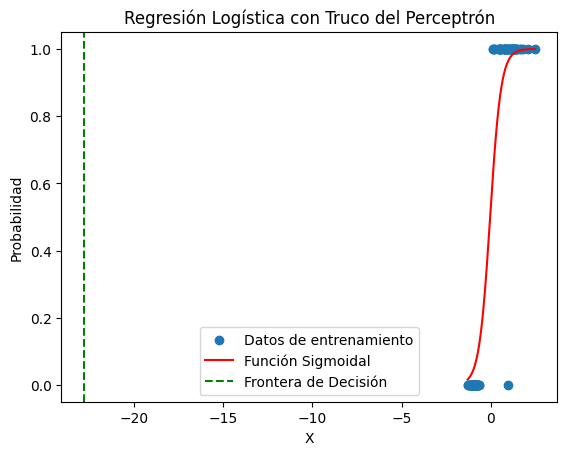

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generar datos de ejemplo
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Entrenar un modelo de regresión logística usando el truco del perceptrón
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X, y)

# Visualizar la función sigmoide y la frontera de decisión
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_range)[:, 1]

plt.scatter(X, y, label='Datos de entrenamiento')
plt.plot(X_range, y_proba, color='red', label='Función Sigmoidal')
plt.axvline(log_reg.coef_[0, 0] / -log_reg.intercept_, color='green', linestyle='--', label='Frontera de Decisión')
plt.title('Regresión Logística con Truco del Perceptrón')
plt.xlabel('X')
plt.ylabel('Probabilidad')
plt.legend()
plt.show()

**Interpretación:**

- La línea verde en la gráfica representa la frontera de decisión, el punto donde la probabilidad predicha es igual a 0.5.
- La función sigmoide modela cómo las probabilidades cambian con respecto a la variable $(X)$.
- El truco del perceptrón se refiere al hecho de que, aunque la regresión logística utiliza una función sigmoide, el proceso de entrenamiento es similar al del perceptrón.

# **62. Regresión logística | Función sigmoidea**

La función sigmoide es una función de activación comúnmente utilizada en regresión logística. Su forma matemática es la siguiente:

$\sigma(z) = \frac{1}{1 + e^{-z}}$

Donde:
- $\sigma(z)$ es la salida de la función sigmoide.
- $(e)$ es la base del logaritmo natural (aproximadamente 2.71828).
- $(z)$ es la entrada a la función, que es la suma ponderada de las características de entrada más el sesgo.

Esta función toma cualquier valor real y lo transforma a un rango entre 0 y 1. La interpretación intuitiva de la salida de la función sigmoide es que representa la probabilidad de que la instancia pertenezca a la clase positiva (clase 1).

A continuación, se proporciona un ejemplo en código de cómo se ve la función sigmoide y cómo se utiliza en el contexto de regresión logística:

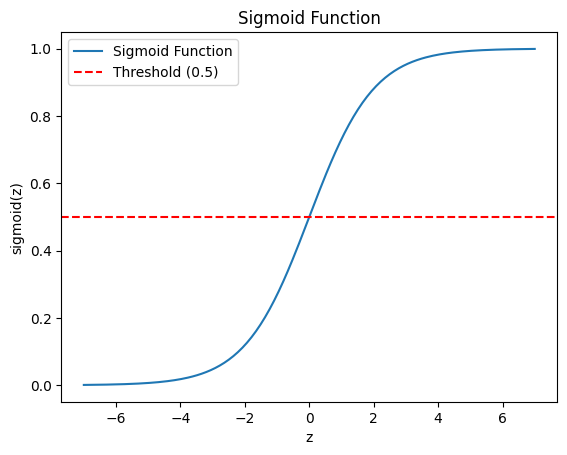

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generar valores de entrada
z_values = np.linspace(-7, 7, 200)

# Calcular los valores de salida de la función sigmoide
sigmoid_values = sigmoid(z_values)

# Visualizar la función sigmoide
plt.plot(z_values, sigmoid_values, label='Sigmoid Function')
plt.axhline(0.5, color='red', linestyle='--', label='Threshold (0.5)')
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.legend()
plt.show()

En este ejemplo, la línea roja punteada representa el umbral de decisión en 0.5. Si la salida de la función sigmoide es mayor que 0.5, la instancia se clasifica como positiva; de lo contrario, se clasifica como negativa.

Es importante destacar que la regresión logística utiliza la función sigmoide para modelar la probabilidad de que una instancia pertenezca a una clase específica. La interpretación de la salida de la función sigmoide es crucial para comprender cómo se toman las decisiones de clasificación en este tipo de modelos.

# **63. Regresión logística | Función de pérdida | Máxima probabilidad | Entropía cruzada binaria**

**Regresión Logística: Función de Pérdida (Entropía Cruzada Binaria)**

La regresión logística utiliza la entropía cruzada binaria como función de pérdida, también conocida como pérdida logarítmica. La función de pérdida mide la discrepancia entre las predicciones del modelo y los valores reales (etiquetas) en el conjunto de entrenamiento.

**Entropía Cruzada Binaria:**

La fórmula de la entropía cruzada binaria para un solo ejemplo es:

$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})]$

- $(m)$ es el número de ejemplos en el conjunto de entrenamiento.
- $(y^{(i)})$ es la etiqueta real del i-ésimo ejemplo.
- $(\hat{y}^{(i)})$ es la predicción del modelo para el i-ésimo ejemplo.

La función de pérdida se minimiza ajustando los parámetros del modelo $(\theta)$. La interpretación intuitiva es que la entropía cruzada binaria mide la diferencia entre la distribución de probabilidad predicha por el modelo $(\hat{y})$ y la distribución de probabilidad real $(y)$.

A continuación, se proporciona un ejemplo en código utilizando la entropía cruzada binaria con regresión logística:

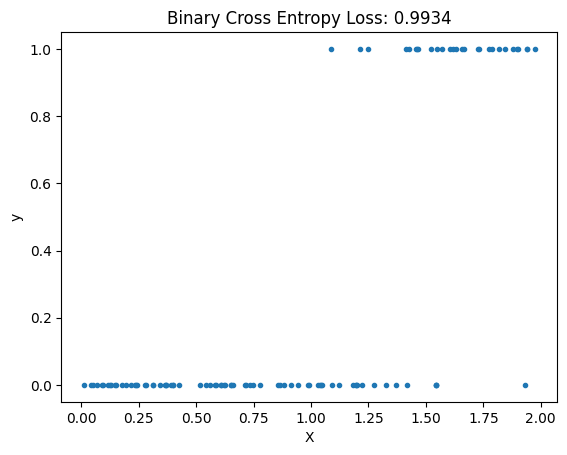

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de pérdida: Entropía Cruzada Binaria
def binary_cross_entropy(y, y_pred):
    m = len(y)
    epsilon = 1e-15  # Evitar el logaritmo de cero
    loss = - (1/m) * np.sum(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))
    return loss

# Generar datos de ejemplo
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = (4 + 3 * X + np.random.randn(100, 1) > 8).astype(int)

# Inicializar parámetros del modelo
theta = np.random.randn(2, 1)

# Agregar sesgo a las características
X_b = np.c_[np.ones((100, 1)), X]

# Calcular predicciones
y_pred = sigmoid(X_b.dot(theta))

# Calcular la pérdida
loss = binary_cross_entropy(y, y_pred)

# Visualizar la función de pérdida
plt.scatter(X, y, marker='.')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Binary Cross Entropy Loss: {loss:.4f}')
plt.show()

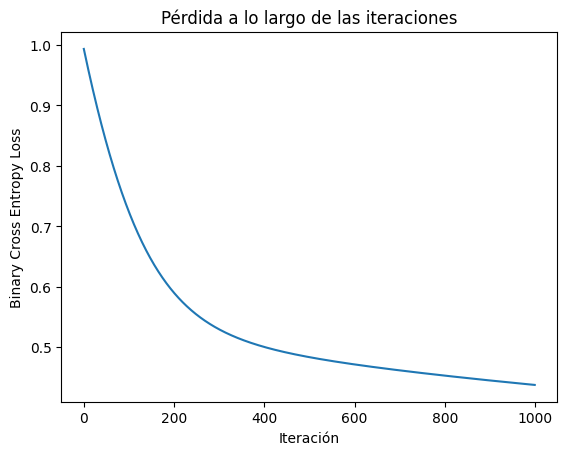

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de pérdida: Entropía Cruzada Binaria
def binary_cross_entropy(y, y_pred):
    m = len(y)
    epsilon = 1e-15  # Evitar el logaritmo de cero
    loss = - (1/m) * np.sum(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))
    return loss

# Generar datos de ejemplo
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = (4 + 3 * X + np.random.randn(100, 1) > 8).astype(int)

# Inicializar parámetros del modelo
theta = np.random.randn(2, 1)

# Agregar sesgo a las características
X_b = np.c_[np.ones((100, 1)), X]

# Número de iteraciones y tasa de aprendizaje para el descenso de gradiente
n_iterations = 1000
learning_rate = 0.01

# Almacenar la pérdida en cada iteración
losses = []

# Realizar descenso de gradiente
for iteration in range(n_iterations):
    # Calcular predicciones
    y_pred = sigmoid(X_b.dot(theta))
    # Calcular la pérdida y almacenarla
    loss = binary_cross_entropy(y, y_pred)
    losses.append(loss)
    # Calcular gradientes
    gradients = X_b.T.dot(y_pred - y) / len(y)
    # Actualizar parámetros
    theta = theta - learning_rate * gradients

# Visualizar la función de pérdida a lo largo de las iteraciones
plt.plot(range(n_iterations), losses)
plt.xlabel('Iteración')
plt.ylabel('Binary Cross Entropy Loss')
plt.title('Pérdida a lo largo de las iteraciones')
plt.show()

Este ejemplo utiliza una función sigmoide y la entropía cruzada binaria para calcular y visualizar la pérdida de un modelo de regresión logística en un conjunto de datos sintético. La pérdida disminuirá a medida que el modelo ajusta sus parámetros para hacer predicciones más cercanas a las etiquetas reales.

# **64. Derivada de la función sigmoidea**

La función sigmoide es una función de activación comúnmente utilizada en modelos de regresión logística y en redes neuronales para producir salidas en el rango de 0 a 1. La fórmula de la función sigmoide es:

$\sigma(z) = \frac{1}{1 + e^{-z}}$

Donde $(z)$ es la entrada de la función. La derivada de la función sigmoide con respecto a $(z)$ se puede calcular utilizando reglas de derivación básicas. La derivada de la función sigmoide es importante en el contexto del descenso de gradiente, ya que se utiliza para calcular los gradientes durante la retropropagación.

La derivada de la función sigmoide $(\sigma'(z))$ se puede expresar en términos de la propia función sigmoide:

$\sigma'(z) = \sigma(z) \cdot (1 - \sigma(z))$

Ahora, veamos cómo implementar esto en código y visualizar la función sigmoide y su derivada:

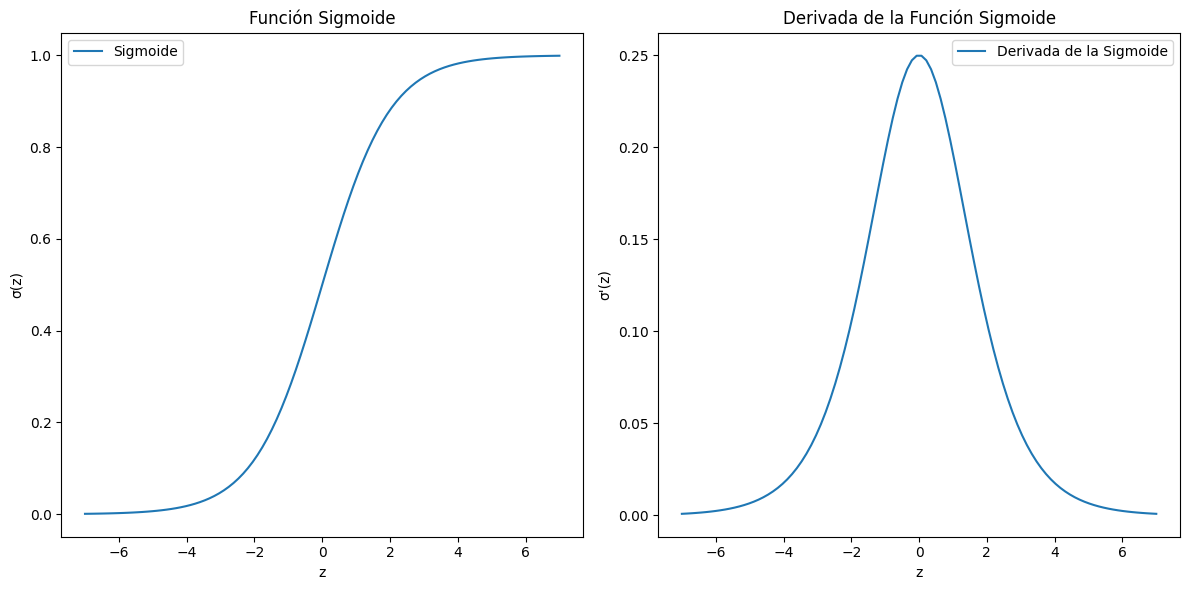

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calcular la derivada de la función sigmoide
def sigmoid_derivative(z):
    sig = sigmoid(z)
    return sig * (1 - sig)

# Generar valores de z
z_values = np.linspace(-7, 7, 100)

# Calcular la función sigmoide y su derivada
sigmoid_values = sigmoid(z_values)
sigmoid_derivative_values = sigmoid_derivative(z_values)

# Visualizar la función sigmoide y su derivada
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(z_values, sigmoid_values, label='Sigmoide')
plt.title('Función Sigmoide')
plt.xlabel('z')
plt.ylabel('σ(z)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(z_values, sigmoid_derivative_values, label="Derivada de la Sigmoide")
plt.title('Derivada de la Función Sigmoide')
plt.xlabel('z')
plt.ylabel("σ'(z)")
plt.legend()

plt.tight_layout()
plt.show()

En este código, `sigmoid` calcula la función sigmoide, y `sigmoid_derivative` calcula la derivada de la función sigmoide. Luego, se generan valores de $(z)$ y se visualizan la función sigmoide y su derivada en subgráficos separados. La función sigmoide se encuentra en el rango (0, 1), y su derivada alcanza su máximo valor en $(z = 0)$ y disminuye hacia los extremos.

# **65. Regresión logística | Descenso de gradiente y código desde cero**

La regresión logística es un modelo de clasificación utilizado para predecir la probabilidad de que una instancia pertenezca a una clase particular. El descenso de gradiente es un algoritmo de optimización que se utiliza para minimizar la función de pérdida y ajustar los parámetros del modelo. Vamos a implementar el descenso de gradiente para la regresión logística desde cero y visualizar el proceso.

Primero, definiremos la función sigmoide y la función de pérdida (entropía cruzada binaria) en Python:

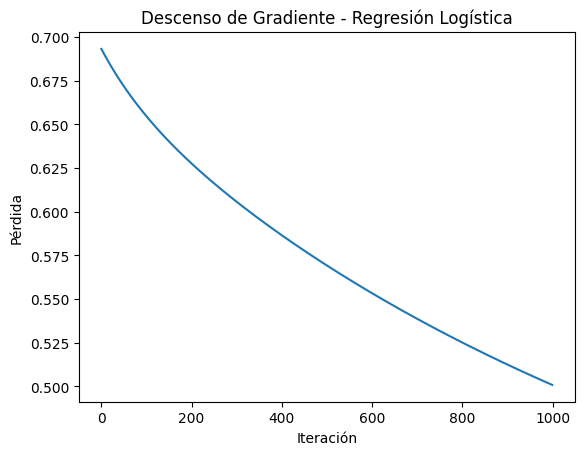

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de pérdida: Entropía Cruzada Binaria
def binary_cross_entropy(y, y_pred):
    epsilon = 1e-15  # Evitar el logaritmo de cero
    loss = - (1/len(y)) * np.sum(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))
    return loss

# Descenso de gradiente para regresión logística
def gradient_descent(X, y, learning_rate, n_iterations):
    m, n = X.shape
    theta = np.zeros((n, 1))

    for iteration in range(n_iterations):
        z = np.dot(X, theta)
        y_pred = sigmoid(z)
        gradients = np.dot(X.T, (y_pred - y)) / m
        theta -= learning_rate * gradients

        # Calcular la función de pérdida en cada iteración para visualización
        loss = binary_cross_entropy(y, y_pred)
        losses.append(loss)

    return theta

# Generar datos de ejemplo
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = (4 + 3 * X + np.random.randn(100, 1) > 8).astype(int)

# Agregar sesgo a las características
X_b = np.c_[np.ones((100, 1)), X]

# Configuración de parámetros del descenso de gradiente
learning_rate = 0.01
n_iterations = 1000

# Inicializar lista para almacenar las pérdidas en cada iteración
losses = []

# Aplicar descenso de gradiente
theta = gradient_descent(X_b, y, learning_rate, n_iterations)

# Visualizar la evolución de la función de pérdida
plt.plot(range(n_iterations), losses)
plt.xlabel('Iteración')
plt.ylabel('Pérdida')
plt.title('Descenso de Gradiente - Regresión Logística')
plt.show()

En este código, generamos datos de ejemplo y aplicamos el descenso de gradiente para ajustar los parámetros del modelo de regresión logística. La función de pérdida se calcula en cada iteración, y la evolución de la pérdida se visualiza al final del proceso.

Este es un ejemplo básico, y en aplicaciones prácticas, es común utilizar bibliotecas como scikit-learn para regresión logística, ya que proporcionan implementaciones optimizadas y manejan diversos aspectos del modelado de manera más eficiente.

# **66. Matriz de precisión y confusión | Errores tipo 1 y tipo 2 | Métricas de clasificación**

La matriz de confusión es una herramienta esencial en la evaluación del rendimiento de modelos de clasificación. Permite visualizar el desempeño del modelo al comparar las predicciones con las clases reales. La matriz de confusión tiene cuatro componentes principales: verdaderos positivos (TP), verdaderos negativos (TN), falsos positivos (FP) y falsos negativos (FN).

Vamos a explorar cada uno de estos conceptos y cómo se relacionan con errores tipo 1 y tipo 2. Además, veremos algunas métricas de clasificación comunes como precisión, sensibilidad (recall) y F1-score.

**Ejemplo en código (Python):**

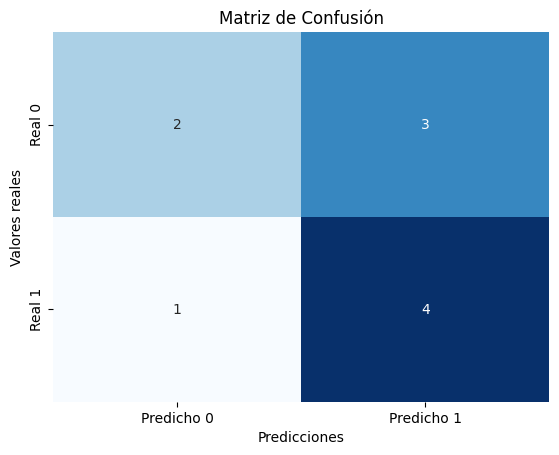

Accuracy: 0.60
Precision: 0.57
Recall: 0.80
F1-score: 0.67


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred = [1, 1, 1, 1, 0, 0, 1, 0, 1, 1]

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Visualización de la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicho 0', 'Predicho 1'],
            yticklabels=['Real 0', 'Real 1'])
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

# Métricas de clasificación
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

**Explicación:**

1. **Matriz de Confusión:**
   - **Verdaderos Positivos (TP):** Casos en los que el modelo predijo correctamente la clase positiva.
   - **Verdaderos Negativos (TN):** Casos en los que el modelo predijo correctamente la clase negativa.
   - **Falsos Positivos (FP):** Casos en los que el modelo predijo incorrectamente la clase positiva.
   - **Falsos Negativos (FN):** Casos en los que el modelo predijo incorrectamente la clase negativa.

2. **Errores Tipo 1 y Tipo 2:**
   - **Error Tipo 1 (Falsos Positivos):** Se produce cuando el modelo predice incorrectamente la presencia de una clase (1) que en realidad no está presente.
   - **Error Tipo 2 (Falsos Negativos):** Se produce cuando el modelo predice incorrectamente la ausencia de una clase (0) que en realidad está presente.

3. **Métricas de Clasificación:**
   - **Accuracy:** Proporción de predicciones correctas.
   - **Precision:** Proporción de predicciones positivas correctas entre todas las predicciones positivas.
   - **Recall (Sensibilidad):** Proporción de casos positivos correctamente identificados entre todos los casos positivos reales.
   - **F1-score:** Media armónica de precision y recall.

La visualización de la matriz de confusión y el cálculo de métricas proporcionan una comprensión detallada del rendimiento del modelo. En el ejemplo, puedes reemplazar los valores de `y_true` y `y_pred` con los de tu propio modelo para evaluar su rendimiento.

# **67. Precisión, recuperación y puntuación F1 | Métricas de clasificación**

Precisión, Recuperación y Puntuación F1:

1. **Precisión (Precision):**
   - Precisión es la proporción de verdaderos positivos (TP) con respecto a todos los elementos predichos como positivos (TP + FP).
   - Se utiliza cuando el costo de los falsos positivos es alto.

2. **Recuperación (Recall o Sensibilidad):**
   - Recuperación es la proporción de verdaderos positivos (TP) con respecto a todos los elementos que son realmente positivos (TP + FN).
   - Se utiliza cuando el costo de los falsos negativos es alto.

3. **Puntuación F1 (F1-score):**
   - F1-score es la media armónica de precisión y recuperación.
   - Es útil cuando hay un desequilibrio entre clases.

**Ejemplo en código (Python):**

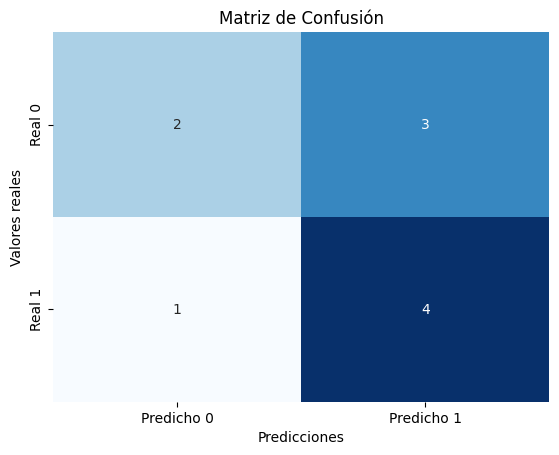

Precisión: 0.57
Recuperación: 0.80
Puntuación F1: 0.67


In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Datos de ejemplo
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred = [1, 1, 1, 1, 0, 0, 1, 0, 1, 1]

# Cálculo de métricas
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Visualización de la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicho 0', 'Predicho 1'],
            yticklabels=['Real 0', 'Real 1'])
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

# Imprimir métricas
print(f'Precisión: {precision:.2f}')
print(f'Recuperación: {recall:.2f}')
print(f'Puntuación F1: {f1:.2f}')

**Explicación:**

1. **Cálculo de Métricas:**
   - Utilizamos las funciones de `precision_score`, `recall_score` y `f1_score` de scikit-learn para calcular las métricas.

2. **Matriz de Confusión:**
   - La matriz de confusión es visualizada para tener una comprensión completa del desempeño del modelo.

3. **Visualización de la Matriz de Confusión:**
   - La matriz de confusión se visualiza usando `sns.heatmap` para representar de manera clara los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

4. **Interpretación de Métricas:**
   - La precisión, recuperación y puntuación F1 proporcionan información sobre diferentes aspectos del rendimiento del modelo. Dependiendo del problema, puedes ajustar el umbral de decisión para optimizar estas métricas según tus necesidades.

Este ejemplo te permite entender cómo calcular y visualizar estas métricas clave. Puedes aplicar este código a tus propios conjuntos de datos para evaluar el rendimiento de tu modelo de clasificación.

# **68. Regresión Softmax | Regresión logística multinomial | Regresión logística**

La regresión logística y la regresión logística multinomial son técnicas de aprendizaje supervisado utilizadas para problemas de clasificación. La regresión softmax, también conocida como regresión logística multinomial, es una extensión de la regresión logística para problemas de clasificación con más de dos clases. A continuación, proporcionaré una explicación detallada de cada una, junto con ejemplos en código usando Python y visualización con un conjunto de datos ficticio.

**Regresión Logística:**

La regresión logística es utilizada para problemas de clasificación binaria, donde el objetivo es predecir la probabilidad de pertenencia a una de las dos clases. La función logística (o sigmoide) transforma la salida de una combinación lineal de características en un valor entre 0 y 1.

**Ejemplo en código:**

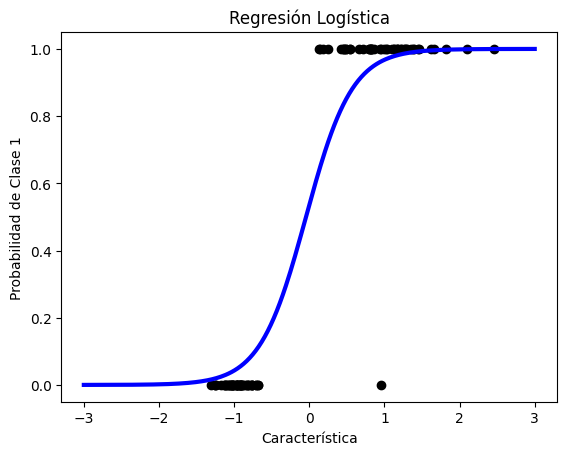

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generar datos de ejemplo
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Ajustar el modelo de regresión logística
model = LogisticRegression()
model.fit(X, y)

# Visualizar la regresión logística
plt.scatter(X, y, color='black')
X_test = np.linspace(-3, 3, 300)
plt.plot(X_test, model.predict_proba(X_test.reshape(-1, 1))[:, 1], color='blue', linewidth=3)
plt.title('Regresión Logística')
plt.xlabel('Característica')
plt.ylabel('Probabilidad de Clase 1')
plt.show()

**Regresión Logística Multinomial (Softmax):**

La regresión logística multinomial, también conocida como softmax, es una extensión de la regresión logística para problemas de clasificación con más de dos clases. Utiliza la función softmax para calcular la probabilidad de pertenencia a cada clase y selecciona la clase con la probabilidad más alta.

**Ejemplo en código:**

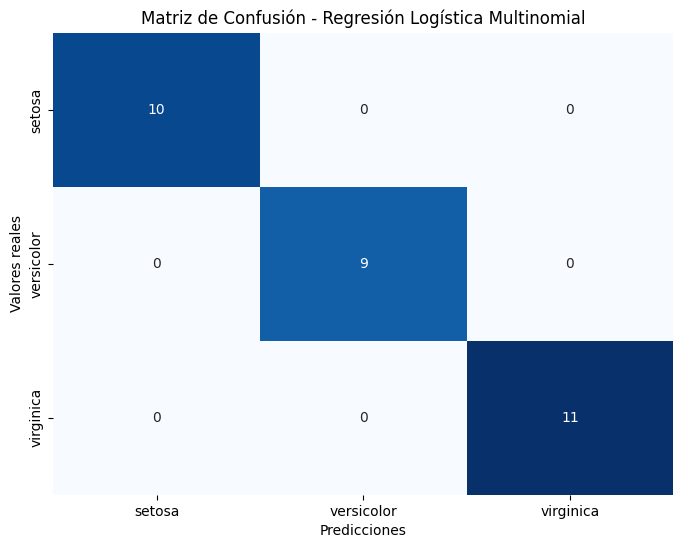

Precisión: 1.00


In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Cargar el conjunto de datos Iris (ejemplo de clasificación multiclase)
iris = load_iris()
X, y = iris.data, iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión logística multinomial
model_multinomial = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_multinomial.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model_multinomial.predict(X_test)

# Calcular la precisión y visualizar la matriz de confusión
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión - Regresión Logística Multinomial')
plt.show()

print(f'Precisión: {accuracy:.2f}')

Ambos ejemplos demuestran cómo ajustar modelos de regresión logística y regresión logística multinomial utilizando la biblioteca scikit-learn en Python. La visualización de la regresión logística muestra la curva sigmoidal, mientras que la matriz de confusión en la regresión logística multinomial ilustra la precisión del modelo en un problema de clasificación multiclase. Estos ejemplos pueden ayudarte a comprender mejor estas técnicas y aplicarlas a tus propios conjuntos de datos.

# **69. Características polinomiales en la regresión logística | Regresión logística no lineal | Regresión logística**

La regresión logística no lineal permite modelar relaciones no lineales entre las características y la variable objetivo. Introducir características polinomiales es una técnica común para lograr esto, ya que permite capturar patrones más complejos en los datos. A continuación, proporcionaré una explicación detallada junto con ejemplos en código y visualización.

**Regresión Logística No Lineal con Características Polinomiales:**

La regresión logística clásica modela las relaciones entre las características y la variable objetivo como lineales. Sin embargo, hay casos en los que la relación entre las características y la variable objetivo es no lineal. Para abordar esto, podemos introducir características polinomiales, que son transformaciones polinómicas de las características originales.

**Ejemplo en código:**

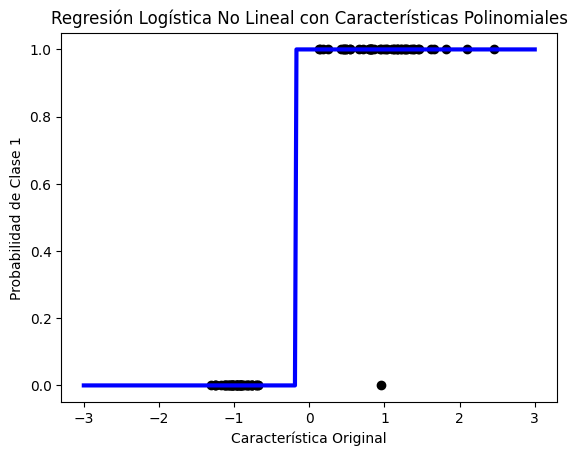

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_classification

# Generar datos de ejemplo con una relación no lineal
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Agregar características polinomiales de grado 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Ajustar el modelo de regresión logística con características polinomiales
model = LogisticRegression()
model.fit(X_poly, y)

# Visualizar la regresión logística no lineal
X_test = np.linspace(-3, 3, 300).reshape(-1, 1)
X_test_poly = poly.transform(X_test)
plt.scatter(X, y, color='black')
plt.plot(X_test, model.predict(X_test_poly), color='blue', linewidth=3)
plt.title('Regresión Logística No Lineal con Características Polinomiales')
plt.xlabel('Característica Original')
plt.ylabel('Probabilidad de Clase 1')
plt.show()

**Explicación:**

1. **Generación de Datos:**
   - Se generan datos de ejemplo con una relación no lineal.

2. **Agregar Características Polinomiales:**
   - Se utiliza `PolynomialFeatures` de scikit-learn para agregar características polinomiales de grado 2 a la característica original.

3. **Ajuste del Modelo:**
   - Se ajusta un modelo de regresión logística utilizando las características polinomiales.

4. **Visualización:**
   - Se visualiza la regresión logística no lineal con características polinomiales.

Al introducir características polinomiales, el modelo de regresión logística es capaz de capturar relaciones no lineales en los datos.

Este enfoque puede extenderse a grados polinomiales más altos según la complejidad de los datos. Sin embargo, es importante tener cuidado con el sobreajuste, ya que características polinomiales de alto grado pueden llevar a modelos que se ajustan demasiado a los datos de entrenamiento y no generalizan bien a nuevos datos. La elección del grado del polinomio debe ser guiada por la naturaleza de los datos y la complejidad del problema.

# **70. Hiperparámetros de regresión logística**

Los hiperparámetros son configuraciones que no se aprenden directamente del modelo durante el entrenamiento, sino que deben establecerse antes de iniciar el proceso de entrenamiento. En el caso de la regresión logística, hay varios hiperparámetros que se pueden ajustar para optimizar el rendimiento del modelo. Algunos de los hiperparámetros más comunes son:

1. **`penalty` (Penalización):**
   - Controla el término de penalización aplicado a los coeficientes. Puede ser "l1" (regularización L1), "l2" (regularización L2) o "none" (sin penalización).

2. **`C` (Inversa de la fuerza de regularización):**
   - Parámetro de regularización que controla la intensidad de la penalización. Valores más pequeños especifican una regularización más fuerte.

3. **`solver` (Algoritmo de optimización):**
   - Determina el algoritmo de optimización utilizado para ajustar el modelo. Algunas opciones comunes son "liblinear" para conjuntos de datos pequeños y "lbfgs" para conjuntos de datos más grandes.

4. **`max_iter` (Número máximo de iteraciones):**
   - Especifica el número máximo de iteraciones para que el algoritmo de optimización converja.

**Ejemplo en código:**

Precisión del modelo: 0.88


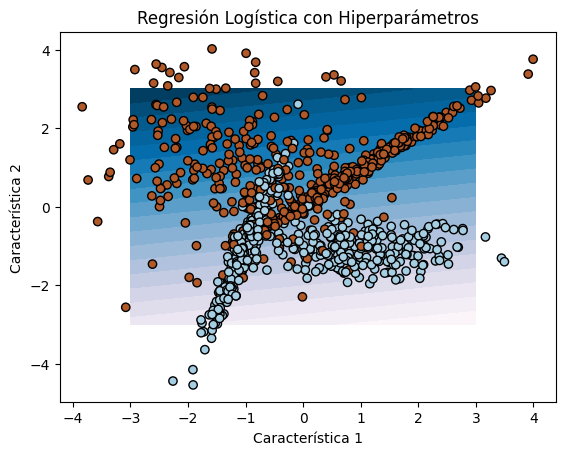

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar características (importante para algunos solvers)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar el modelo de regresión logística con algunos hiperparámetros
model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100)

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train_scaled, y_train)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test_scaled)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Visualizar la regresión logística en el espacio de características
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 20), cmap=plt.cm.PuBu)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.title('Regresión Logística con Hiperparámetros')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

**Explicación:**

1. **Generación de Datos:**
   - Se generan datos de ejemplo con `make_classification` de scikit-learn.

2. **División de Datos:**
   - Los datos se dividen en conjuntos de entrenamiento y prueba.

3. **Estandarización de Características:**
   - Las características se estandarizan para mejorar el rendimiento del modelo.

4. **Inicialización y Ajuste del Modelo:**
   - Se inicializa el modelo de regresión logística con ciertos hiperparámetros y se ajusta a los datos de entrenamiento.

5. **Predicciones y Evaluación:**
   - Se realizan predicciones en los datos de prueba y se evalúa la precisión del modelo.

6. **Visualización:**
   - Se visualiza la regresión logística en el espacio de características para mostrar la separación de las clases.

Es importante ajustar los hiperparámetros según las características específicas del conjunto de datos y el problema. El ejemplo proporciona una introducción básica al ajuste de hiperparámetros en la regresión logística.

| **Inicio** | **atrás 6** | **Siguiente 8** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./6_Machine_Learning.ipynb)| [⏩](./8_Machine_Learning.ipynb)|